<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Parcial_2_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install language-tool-python
!pip install translate
!pip install unidecode
!pip install pyLDAvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=fad3afeba670f639e857f6783f278d7efc2e82164221e93d95f0e6ab65a40c8c
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


#**0. Cargamos Librerias**

In [ ]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/drive')
from googletrans import Translator
import language_tool_python
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import plotly.express as px # graficos
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from collections import Counter
from textblob import TextBlob  #
from unidecode import unidecode
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from gensim import corpora
from gensim.models import LdaModel,CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import gensim

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#**1.Cargamos la base de datos**

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/dev.csv')
datos.head()

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
2,sexism2022_english-3553,I agree with that but at the same time I know ...,sexist,2. derogation,2.1 descriptive attacks,dev
3,sexism2022_english-13328,democrats from Minnesota (leftist muzzie shith...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev
4,sexism2022_english-81,Texas jury sentences Jordanian immigrant to de...,not sexist,none,none,dev


In [ ]:
datos_muestra=datos.sample(1000, random_state=1001367697)
datos_muestra.head()

,rewire_id,text,label_sexist,label_category,label_vector,split
1346,sexism2022_english-2812,Logic! But I guarantee she'll say some shit li...,sexist,2. derogation,2.1 descriptive attacks,dev
1910,sexism2022_english-13276,That guy is an NRO plant. Cuckus Maximus,not sexist,none,none,dev
1995,sexism2022_english-6672,The future is female guys,not sexist,none,none,dev
507,sexism2022_english-3996,"According to my calculations, all women are me...",sexist,2. derogation,2.1 descriptive attacks,dev
1123,sexism2022_english-8520,I have found their reactions to be that they p...,not sexist,none,none,dev


In [ ]:
datos_muestra.isna().sum()

,0
rewire_id,0
text,0
label_sexist,0
label_category,0
label_vector,0
split,0
sentimiento,0


#**2. Análisis de Sentimientos**

In [ ]:
sia = SentimentIntensityAnalyzer() # Definimos el algoritmo base
def analisis_sentimiento(texto):
  """
  Recibe un texto
  Retorna el sentimiento del texto, negativo, positivo, neutral
  """
  sentimiento = sia.polarity_scores(texto)['compound']  # Devuelve un diccionario con los resultados
  if sentimiento >0:
    etiqueta= "positivo"
  elif sentimiento <0:
    etiqueta= "negativo"
  else:
    etiqueta= "neutral"
  return etiqueta

In [ ]:
datos_muestra["sentimiento"]=datos_muestra["text"].apply(analisis_sentimiento)

In [ ]:
datos_muestra["sentimiento"].value_counts()

,count
sentimiento,
negativo,501
positivo,356
neutral,143


El sentimiento más frecuente es el **negativo**

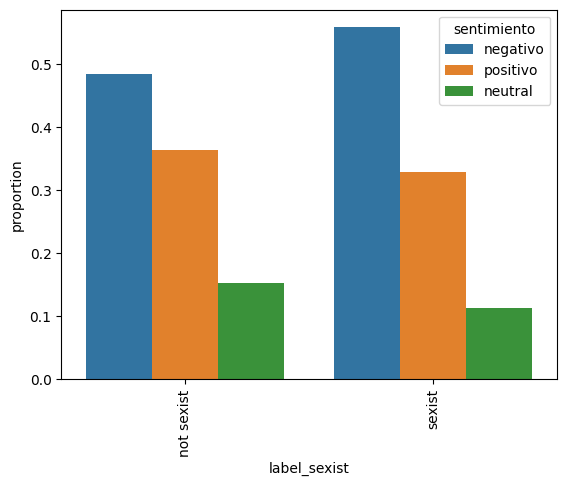

In [ ]:
tabla_frecuencia_relacion = datos_muestra.groupby('label_sexist')['sentimiento'].value_counts(normalize=True)
sns.barplot(data = tabla_frecuencia_relacion.reset_index(), x = 'label_sexist', y = 'proportion', hue = 'sentimiento')
plt.xticks(rotation=90)
plt.show()

El sentimiento que se asocia a una mayor proporción de textos sexistas es el **negativo**. Sin embargo, notamos que también es el sentimiento que predomina en los textos no sexistas.

#**3. Entidades**

### Entidades Reconocidas por `spacy.load("en_core_web_sm")`:

1. **PERSON**: Personas, figuras famosas o personajes ficticios.
   - Ejemplo: "Barack Obama", "Harry Potter".

2. **NORP**: Grupos étnicos, religiosos o políticos.
   - Ejemplo: "American", "Christian", "Communist".

3. **FAC**: Edificios, aeropuertos, carreteras, puentes, etc.
   - Ejemplo: "Eiffel Tower", "Wall Street".

4. **ORG**: Organizaciones, incluyendo compañías, agencias gubernamentales, instituciones.
   - Ejemplo: "Google", "United Nations", "NASA".

5. **GPE**: Países, ciudades o estados.
   - Ejemplo: "France", "New York", "California".

6. **LOC**: Lugares no geopolíticos (montañas, ríos, regiones).
   - Ejemplo: "Mount Everest", "Sahara Desert".

7. **PRODUCT**: Productos o bienes tangibles (objetos físicos).
   - Ejemplo: "iPhone", "Ford Mustang".

8. **EVENT**: Eventos nombrados, incluyendo guerras, concursos deportivos, desastres, etc.
   - Ejemplo: "World War II", "Super Bowl", "Olympics".

9. **WORK_OF_ART**: Títulos de obras de arte, libros, canciones, películas, etc.
   - Ejemplo: "The Mona Lisa", "Inception", "Bohemian Rhapsody".

10. **LAW**: Documentos legales nombrados.
   - Ejemplo: "Constitution", "The Magna Carta".

11. **LANGUAGE**: Idiomas.
   - Ejemplo: "English", "Spanish", "Mandarin".

12. **DATE**: Fechas, períodos de tiempo o cualquier expresión de tiempo.
   - Ejemplo: "June 25, 2023", "next Monday", "two weeks".

13. **TIME**: Tiempos dentro del día.
   - Ejemplo: "2:30 PM", "midnight", "morning".

14. **PERCENT**: Porcentajes.
   - Ejemplo: "50%", "20 percent".

15. **MONEY**: Cantidades monetarias.
   - Ejemplo: "$100", "500 euros", "10 dollars".

16. **QUANTITY**: Cantidades de unidades.
   - Ejemplo: "10 kilograms", "5 liters", "several meters".

17. **ORDINAL**: Números ordinales.
   - Ejemplo: "first", "second", "third".

18. **CARDINAL**: Números cardinales que no caen bajo otra categoría.
   - Ejemplo: "one", "two", "100"

In [ ]:
nlp = spacy.load("en_core_web_sm") # lectura del modelo
def extraer_entidades(texto):
  """
  Por cada noticia vamos a extraer las entidades de tipo PERSON, NORP, ORG, GPE
  Retorna un texto con las entidades separadas por ,
  """
  doc = nlp(texto) # aplicamos el algoritmo
  entidades=[] # entidades
  for ent in doc.ents:
    if ent.label_  in ["PERSON", "NORP", "ORG", "GPE"]:
      entidades.append(ent.text) # añadimos a la lista
  entidades=','.join(entidades) # unimos la lista por comas
  entidades=entidades.lower() # todo a minúsculas
  return entidades

In [ ]:
datos_muestra["entidades"] = datos_muestra["text"].apply(extraer_entidades)

In [ ]:
join_text = ",".join(datos_muestra["entidades"])
pd.Series(join_text.split(",")).value_counts().iloc[0:20]

,count
,636
trump,27
muslim,16
jews,13
asian,12
hillary,10
us,8
gabfam,7
lol,6
maga,6


Notamos que las entidades más frecuentes son trump (27), muslim	(16), jews	(13), asian	(12), y hillary	(10). De estas 5 más frecuentes aparecen dos personas políticas 'trump' y 'hillary', lo que tiene sentido por las próximas elecciones presidenciales, es decir el texto puede ser con base a algo mencionado durante alguna entrevista o evento de alguno de los candidatos y eso por eso que aparecen en esta base de datos. Por otro lado, las otras tres entidades más frecuentes son grupos etnicos y/o religiosos, lo que se podría interpretar como que este tipo de personas suelen ser sexualizadas, o en el mejor de los casos todo lo contrario.

#**4. Limpieza**

In [ ]:
stop_words_nltk_en =list(set(stopwords.words('english')))
stop_words_nltk_en =["go", "lot", "ask", "let", "u","url","get", *stop_words_nltk_en] #Agregamos más stop_words que encontramos en la nube de palabras que no nos dan información
def texto_limpio(texto, idioma="en"):
  """
  Recibe un texto
  Retorna un texto sin simbolos, sin stopwords, en minusculas
  """
  texto_limpio=str(texto).lower() #Pasamos a minusculas
  # blob = TextBlob(texto_limpio )
  # texto_limpio= blob.correct().string
  texto_limpio = re.sub(r'https?://\S+|www\.\S+', ' ', texto_limpio) # Eliminar URL
  texto_limpio= re.sub(r"[^A-Za-z]+",' ',texto_limpio) # Eliminar simbolos
  texto_limpio = texto_limpio.split() # Seperacion de tokens
  texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_en] # Eliminacción de stop word
  texto_limpio = " ".join(texto_limpio)
  return texto_limpio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_muestra["texto_limpio"]=datos_muestra["text"].apply(texto_limpio)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


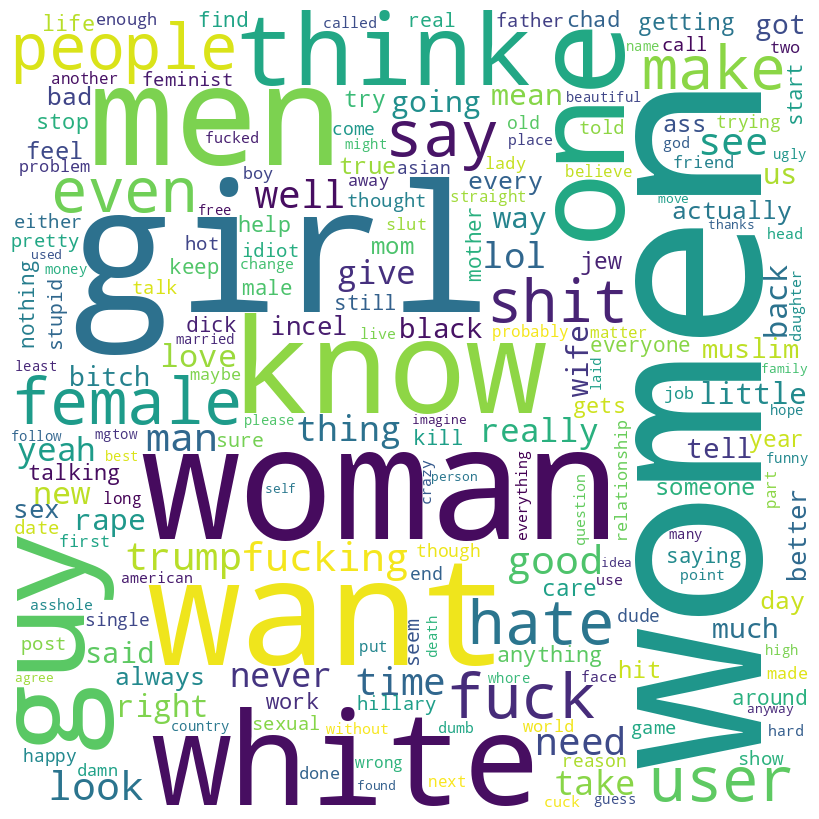

In [ ]:
texto_join =  " ".join(datos_muestra["texto_limpio"])
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(texto_join)
 # mostrar nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#**5. LDA**

In [ ]:
#Limpieza
datos_muestra["texto_limpio1"] = datos_muestra["text"].apply(lambda x: texto_limpio(x, idioma="en"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
count_vectorizer = CountVectorizer(min_df=10, ngram_range =(1,4))
X_count = count_vectorizer.fit_transform(datos_muestra["texto_limpio1"])
X_count.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 172)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

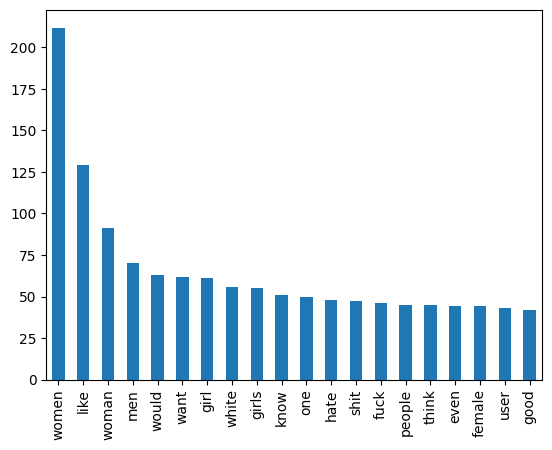

In [ ]:
datos_count=pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
datos_count.sum().sort_values(ascending=False).iloc[0:20].plot(kind="bar")

Aqui notamos que las palabras más frecuentes son 'women' y 'woman', 'like' y 'men', dandonos cuenta que sin duda alguna en esta base de datos 'women' o 'woman' las cuales al final terminan representando lo mismo (mujer), es lo más mencionado. Además 'girl' y 'female' están más adelante en esta lista, comprobando lo que se había dicho anteriormente.

In [ ]:
count_vectorizer = CountVectorizer(min_df=10,ngram_range =(1,4))
X_count = count_vectorizer.fit_transform(datos_muestra["texto_limpio1"])
datos_muestra["tokens"]=datos_muestra["texto_limpio1"].apply(lambda x: x.split())
datos_muestra["tokens"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tokens
1346,"[logic, guarantee, say, shit, like, oh, god, f..."
1910,"[guy, nro, plant, cuckus, maximus]"
1995,"[future, female, guys]"
507,"[according, calculations, women, mentally, ill..."
1123,"[found, reactions, pay, owe, haha, girls, stuc..."
...,...
25,"[fuckin, wuss, trp, grandma, living, room, gon..."
418,"[awake, dnc, must, abolished]"
1832,"[rt, uk, user, tweeted, people, calling, boyco..."
1330,"[know, huh, insane, daughter, yrs, old, hardly..."


In [ ]:
# Crear un diccionario y un corpus
dictionary = corpora.Dictionary([count_vectorizer.get_feature_names_out() ])
corpus = [dictionary.doc2bow(text.split()) for text in datos_muestra["texto_limpio1"]] #"corpus": me representa los tokens en un código

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values = [] # parametro determinar tópicos
model_list = {} # modelos de tópicos
topicos_num= range(2,10)
for num_topics in topicos_num:
    model = gensim.models.LdaModel(corpus=corpus,
                                    id2word=dictionary,
                                    num_topics=num_topics,
                                    random_state=42,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha='auto',
                                    per_word_topics=True)
    model_list[num_topics] = model
    coherencemodel = CoherenceModel(model=model, texts=datos_muestra["tokens"], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


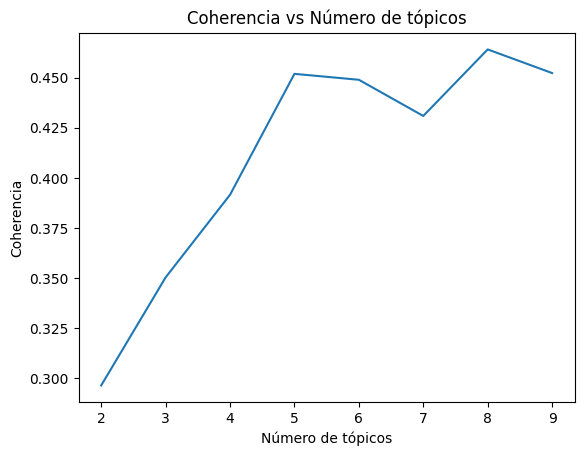

In [ ]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Número de tópicos")
plt.ylabel("Coherencia")
plt.title("Coherencia vs Número de tópicos")
plt.show()

Según la gráfica el número de tópicos sería **8**, puesto que este el punto máximo. No obstante, vamos a mirar los tópicos para ver si dejamos este número de tópicos o lo cambiamos según la distribución de los datos.

In [ ]:
# Visualización interactiva
vis = pyLDAvis.gensim_models.prepare(model_list[8], corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Según el gráfico anterior, vemos que los tópicos 2,4, 5, 6,7, y 8 están relativamente cerca, por lo que muestra que los datos en estos se inclinan a ser similares. Por esta razón, se van a ir probando viendo la distribución de 3 a 7 tópicos para poder identificar el adecuado número de tópicos.

In [ ]:
# Visualización interactiva
vis = pyLDAvis.gensim_models.prepare(model_list[3], corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Después de probar 3 y 7, nos quedamos con 3 tópicos, ya que la distribución de estos es más clara, puesto que con los demás todavía siguen existiendo tópicos muy cercanos.

Se van a considerar solo **3** tópicos. Además cuando revisamos las frecuencias, el resto estaban más disperajas que con este número de tópicos, a pesar de que hay un tópico con tan solo 10 datos.

In [ ]:
topics = model_list[3].print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.103*"women" + 0.057*"like" + 0.050*"woman" + 0.034*"men" + 0.033*"want" + 0.031*"would" + 0.028*"white" + 0.025*"hate" + 0.020*"female" + 0.020*"fuck"')
(1, '0.078*"one" + 0.069*"know" + 0.068*"people" + 0.068*"user" + 0.052*"fucking" + 0.034*"look" + 0.034*"right" + 0.033*"new" + 0.030*"getting" + 0.028*"old"')
(2, '0.037*"girl" + 0.037*"think" + 0.032*"girls" + 0.029*"shit" + 0.027*"lol" + 0.027*"good" + 0.023*"really" + 0.022*"much" + 0.022*"little" + 0.022*"time"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0 = En el gráfico es el tópico 1

1 = En el gráfico es el tópico 3

2 = En el gráfico es el tópico 2

In [ ]:
document_topics = model_list[3].get_document_topics(corpus)
dominant_topics_ = []
for doc_topics in document_topics:
    # Ordenar los tópicos por probabilidad y tomar el de mayor valor
    dominant_topic_ = max(doc_topics, key=lambda x: x[1])[0]  # x[1] es la probabilidad, x[0] es el ID del tópico
    dominant_topics_.append(dominant_topic_)
datos_muestra["dominant_topic"] = dominant_topics_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
set(dominant_topics_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0, 1, 2}

In [ ]:
datos_muestra["dominant_topic"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
dominant_topic,
0,735
2,255
1,10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-124-b3c2be6e46b9>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.barplot(data = tabla_frecuencia_relacion.reset_index(), x = 'dominant_topic', y = 'proportion', hue = 'label_sexist', color='purple')


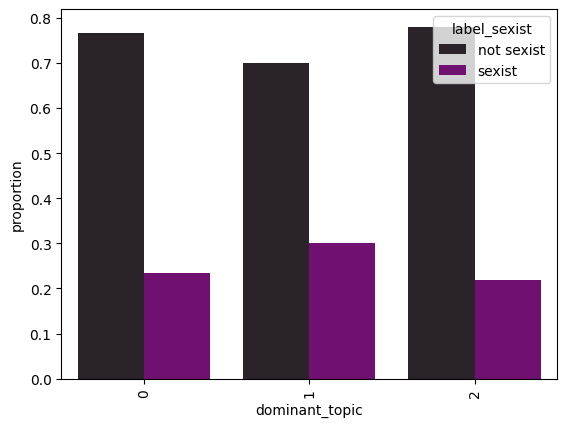

In [ ]:
tabla_frecuencia_relacion = datos_muestra.groupby('dominant_topic')['label_sexist'].value_counts(normalize=True)
sns.barplot(data = tabla_frecuencia_relacion.reset_index(), x = 'dominant_topic', y = 'proportion', hue = 'label_sexist', color='purple')
plt.xticks(rotation=90)
plt.show()

Con base a la gráfica, podemos ver que el tópico qué tiene una mayor proporción de textos sexistas es el tópico 1. Pero, también vemos que los otros dos tópicos también tienen una alta frecuencia de textos sexistas, y no están muy por debajo del resultado del tópico 1. Por otro lado vemos, que este tópico (1) es el que menor cantidad de textos no sexistas en comparación a los otros dos, en donde el 2, tiene mayor proporción en este caso (textos no sexistas).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


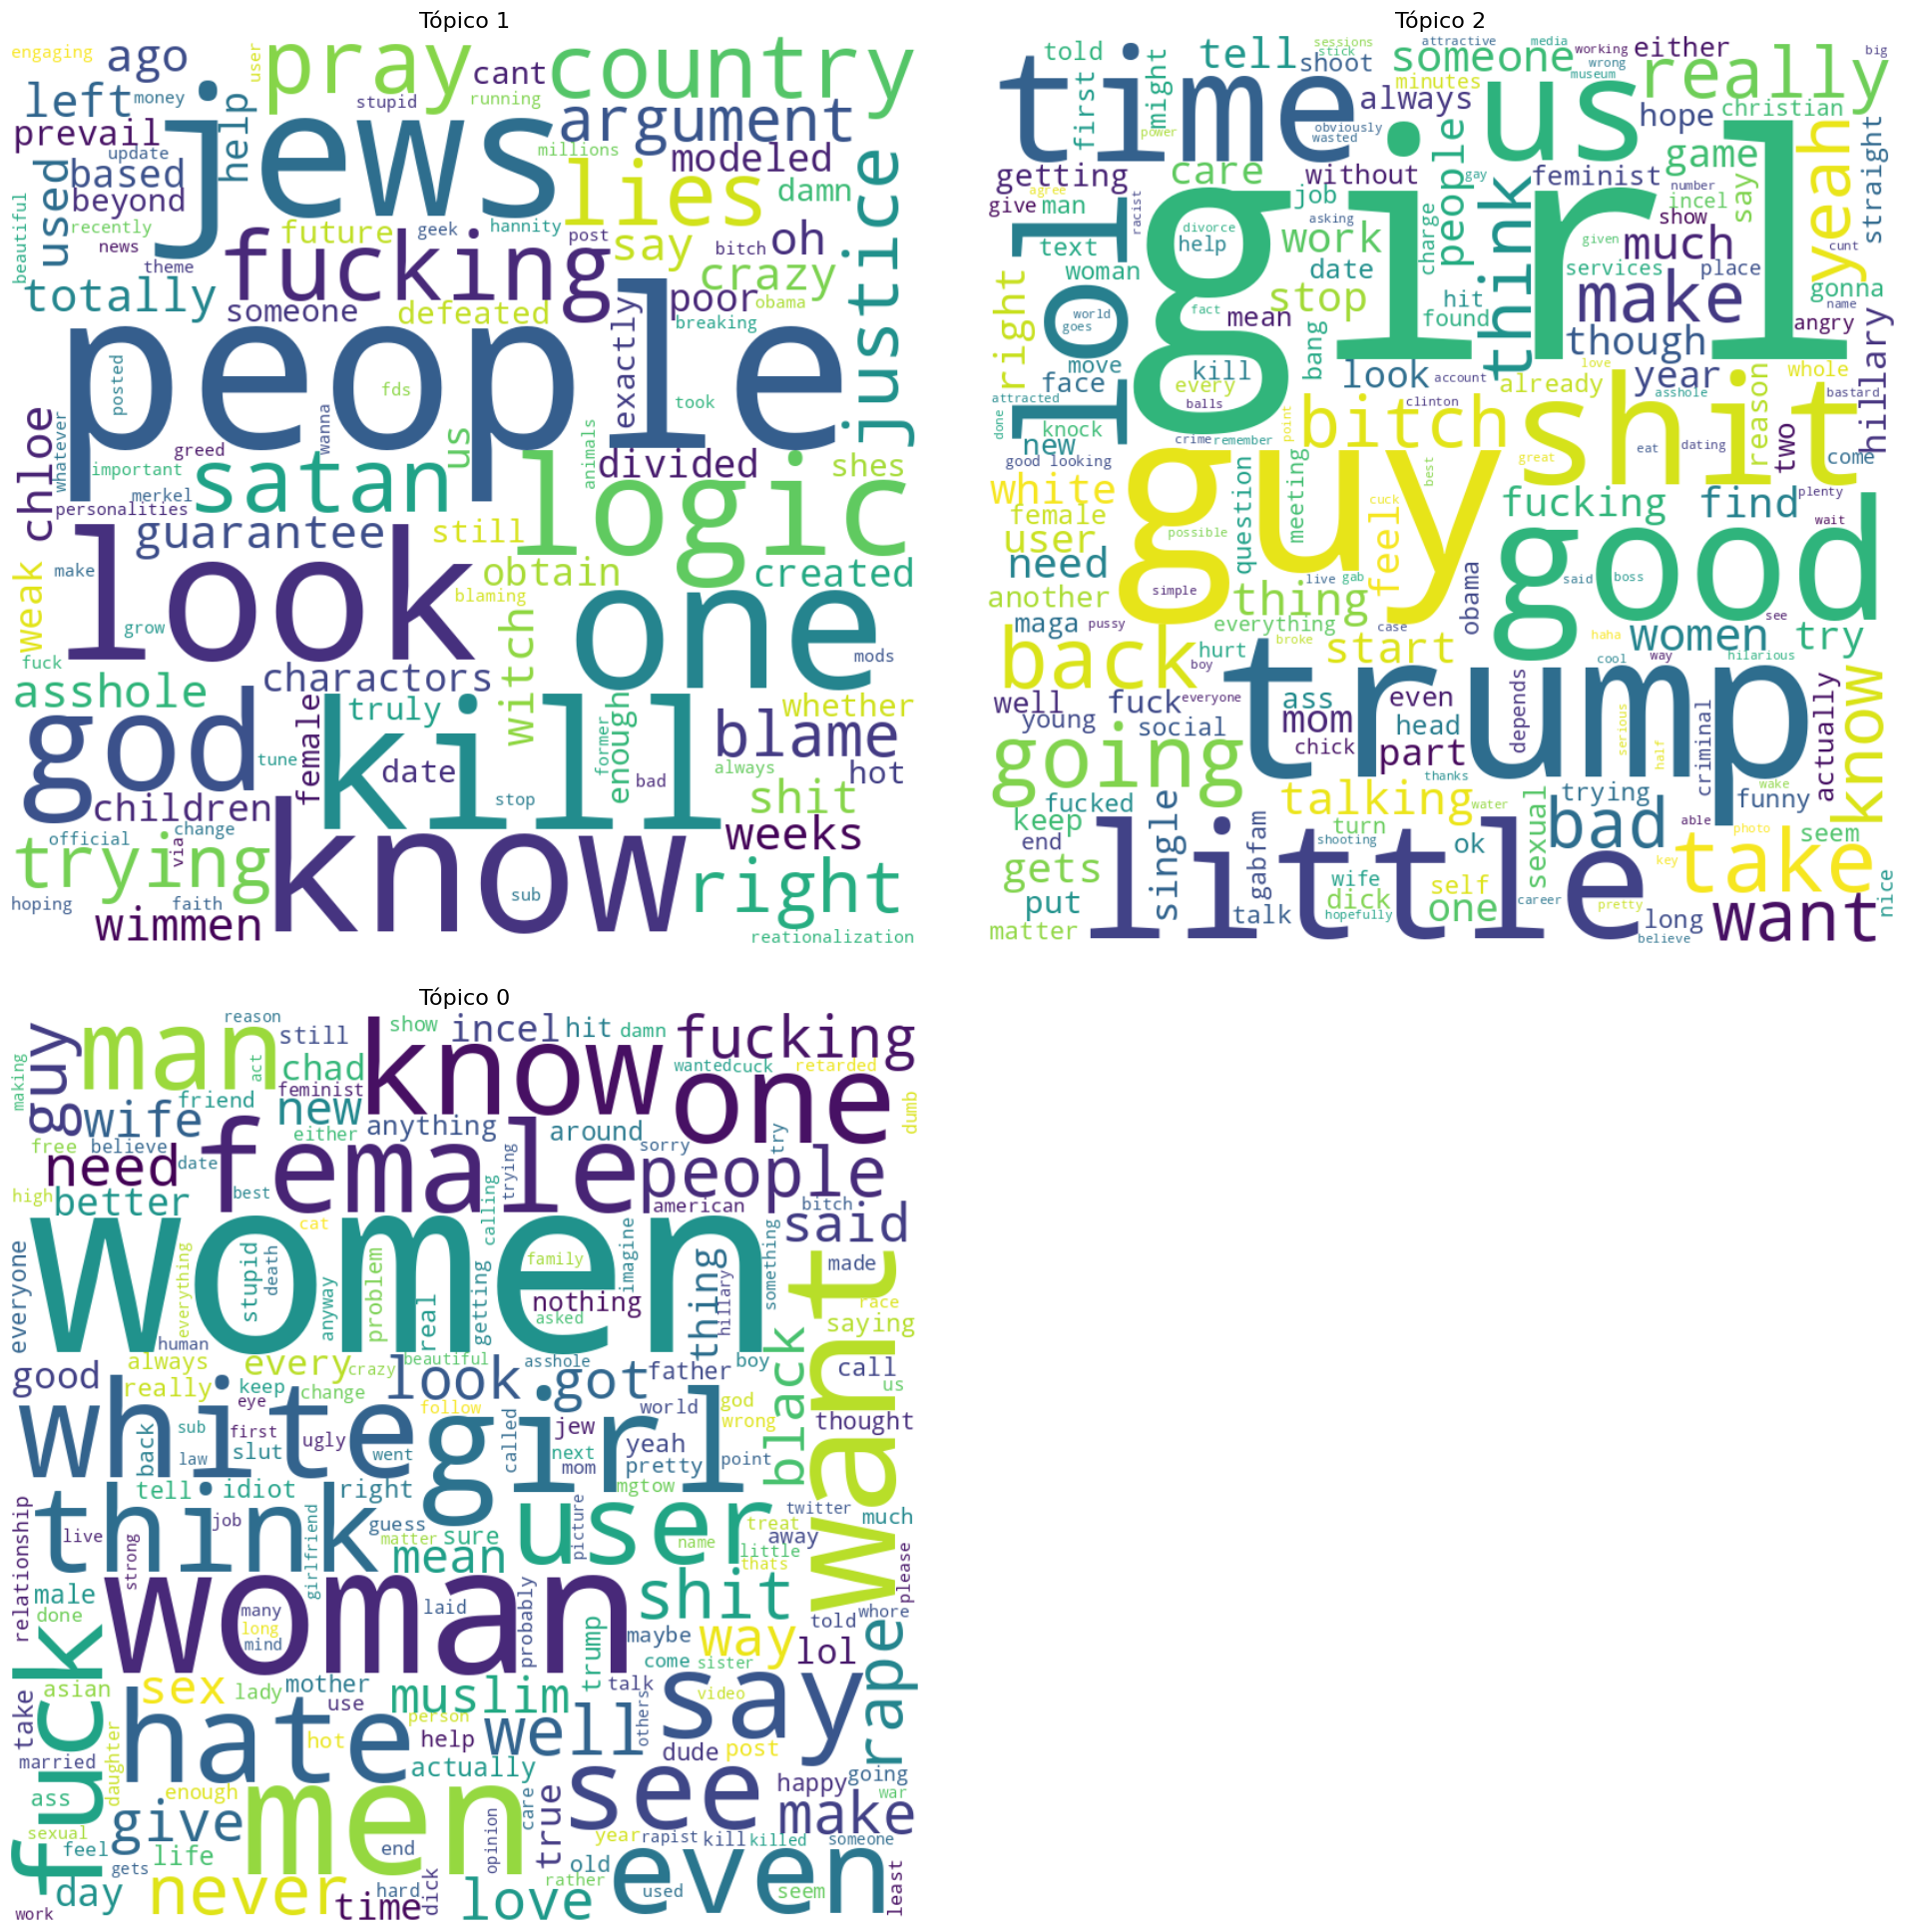

In [ ]:
import math
# Obtener los valores únicos de labels_kmeans
labels_unicos = datos_muestra["dominant_topic"].unique()

# Definir el número de filas y columnas
num_columnas = 2
num_filas =  math.ceil(len(labels_unicos) / num_columnas)  # Calcular el número de columnas necesarias


# Crear la figura y los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(20, 20))  # Ajustar el tamaño total del gráfico
axes = axes.flatten()  # Aplanar el array de ejes para un fácil acceso

# Generar una nube de palabras por cada valor único en labels_kmeans
for i, label in enumerate(labels_unicos):
    # Unir los textos que corresponden al label actual
    filtro_cluster=datos_muestra["dominant_topic"] == label
    texto_join = " ".join(datos_muestra.loc[filtro_cluster, "texto_limpio1"])

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(texto_join)

    # Mostrar la nube de palabras en el subplot correspondiente
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Tópico {label}", fontsize=16)

# Eliminar cualquier subplot vacío (si los hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout(pad=3)
plt.show()

Entre las palabras que vemos en el tópico 1, vemos que predominan palabras como 'jews', 'pray', 'people', 'kill', 'god', 'logic', y 'know'. Con base a estas palabras de este tópico, se podría decir que en este se encuentran aquellos textos que tratan en su mayoria de personas judias. Ahora, sabiendo que este es el tópico que tiene mayor frecuencia de textos sexistas, se podría decir que aqui la mayoria de textos están sexualizando a personas que siguen esta religión o acusandolas de hacer algo relacionado a este tema, y es por eso que salen a relucir palabras como 'god' y 'satan'.